In [1]:
import os
import re
import pickle
import networkx as nx
import matplotlib.pyplot as plt
SQID = 90

def readEntryList(filename, sep='[\s,; ]+'):
    """
    read a text file contains a list of objects ( ligand names / pdb ids / pubchem ids ), 
    which are seperated by common delimiter ( \tab, \space, comma, etc. )
    """
    with open(filename, 'r') as file:
        content = file.read()
    results = re.split(sep, content)
    results = [r.strip().lower() for r in results]
    return results

In [2]:
nxfile = os.path.join('.', f'ClanGraph_{SQID}.pkl')
with open(nxfile, 'rb') as file:
    clanG = pickle.load(file)

In [3]:
cdk2 = ['1b38', '1e1x', '1jsv', '1pxo', '1pxp', 
    '2fvd', '2xmy', '2xnb', '5jq5', '6guh', '6guk']
cdk2_cyclins = ['4bck', '4bcm', '4bcn', '4bco', '4bcp', '4i3z', '6gue']

/home/mxue33/anaconda3/envs/featdock/lib/python3.8/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: Could not load "/home/mxue33/anaconda3/envs/featdock/bin/../lib/graphviz/libgvplugin_pango.so.6" - It was found, so perhaps one of its dependents was not.  Try ldd.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


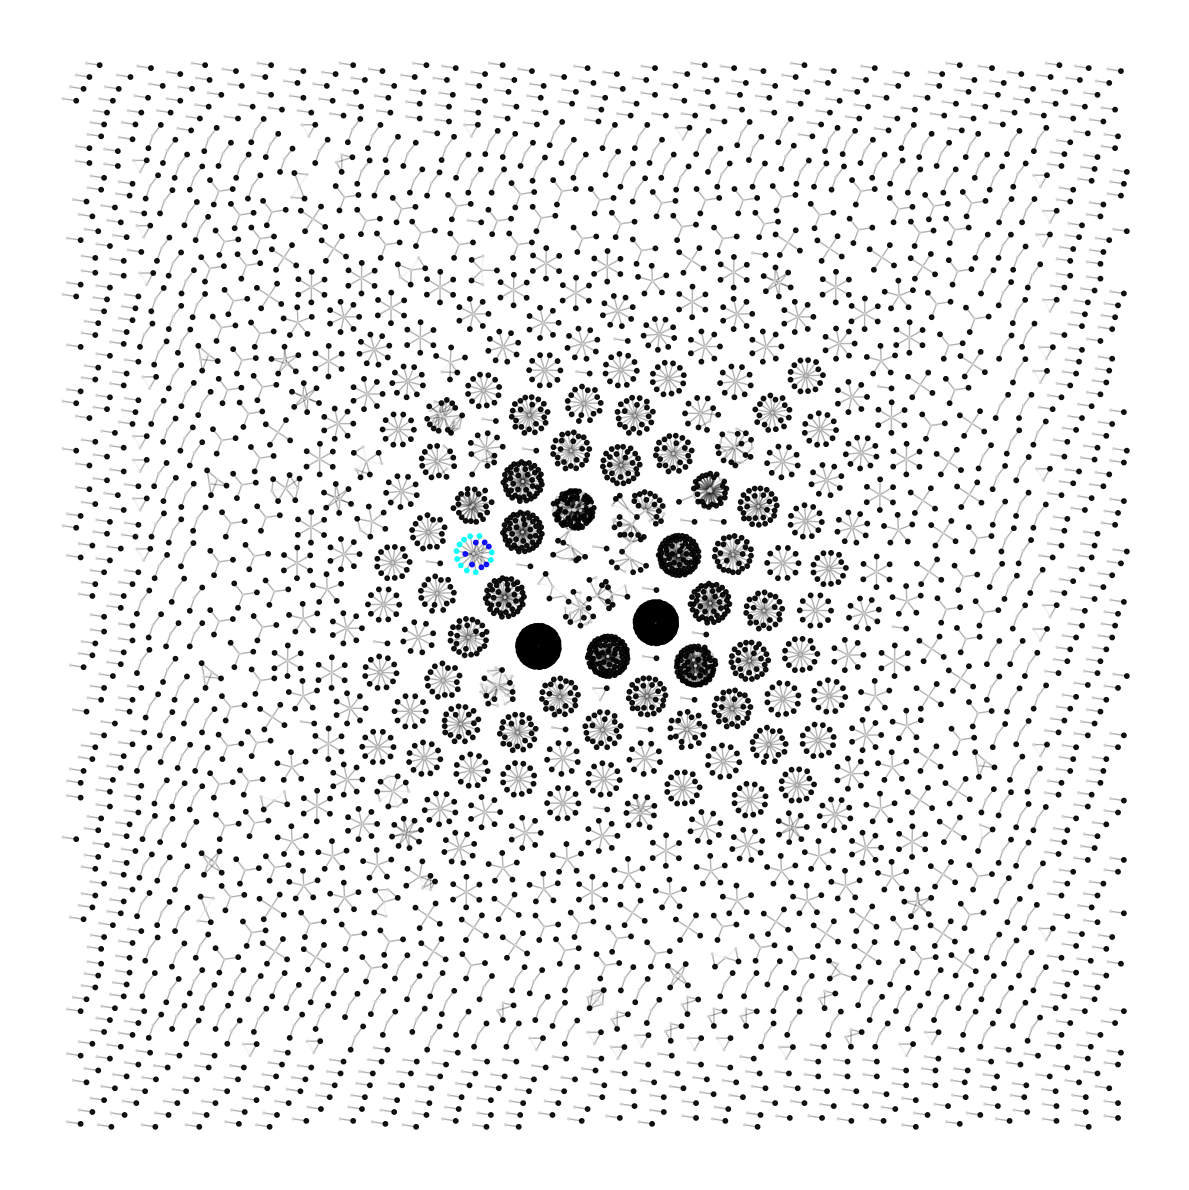

In [4]:
pngfile = os.path.join('.', f'ClanGraph_{SQID}.png')
fig, ax = plt.subplots(figsize=(12, 12))
# Visualize graph components
# pos = nx.spring_layout(clanG)
pos = nx.nx_agraph.graphviz_layout(clanG, prog="neato")
edgecolor = []
edgelength = []
for u, v in clanG.edges():
    if type(u)==int and type(v)==int:
        # two cluster nodes
        edgecolor.append('lightgray')
        
    else:
        # cluster - pdbid edge
        edgecolor.append('black')
nodecolor = []
nodesize = []
for node in clanG.nodes():
    if type(node)==int:
        nodecolor.append('lightgray')
        nodesize.append(2)
    else: 
        if node in cdk2_cyclins:
            nodecolor.append('blue')
        elif node in cdk2:
            nodecolor.append('cyan')
        else:
            nodecolor.append('black')
        nodesize.append(10)

nx.draw_networkx_edges(clanG, pos, alpha=0.3, edge_color=edgecolor)
nx.draw_networkx_nodes(clanG, pos, node_color=nodecolor, node_size=nodesize, alpha=0.9)
ax.margins(0, 0)
fig.tight_layout()
plt.axis("off")
plt.savefig(pngfile, dpi=600, bbox_inches='tight')